In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [82]:
#data points
xs = [1.0, 2.0]
ys = [30.0, 40.0]

#model y(x) = m
def y(x, theta):
    return theta[0]

#'error'
def chisq(Dx, Dy, theta):
    s = 0
    for i in range(0,len(Dx)):
        #(predicted - data)^2 
        s += (y(Dx[i],theta) - Dy[i])**2
    #chisq per dof
    return s / len(Dx)

#likelihood function
#P = exp(-chisq)
#but don't do exp to work with log likelihood instead
def P(Dx, Dy, theta):
    return (-1 * chisq(Dx,Dy,theta))

#initial guess for theta
theta_current = [0.]
#initial likelihood
P_current = P(xs, ys, theta_current)
        
#array to save mcmc chain
chain = []

#mcmc loop
for i in range(5000):
    #randomly draw new proposed theta:
    #current theta plus small random number
    theta_proposed = [theta + 0.1*np.random.randn() for theta in theta_current]
    P_proposed = P(xs, ys, theta_proposed)
    
    #calculate likelihood ratio
    #P_proposed / P_current
    #now you need to exponentiate
    ratio = np.exp(P_proposed - P_current)
    
    #decide whether to accept or reject new values
    #if ratio > 1, accept
    if ratio > 1:
        theta_current = theta_proposed
        P_current = P_proposed
    #otherwise, draw a random number r between 0 and 1
    else:
        r = np.random.rand()
        #if ratio > r, accept
        if ratio > r:
            theta_current = theta_proposed
            P_current = P_proposed
        #if ratio < r, reject theta_proposed
        #start the loop over (new proposed theta)
    
    #save current theta value in the chain
    chain.append(theta_current[0])   

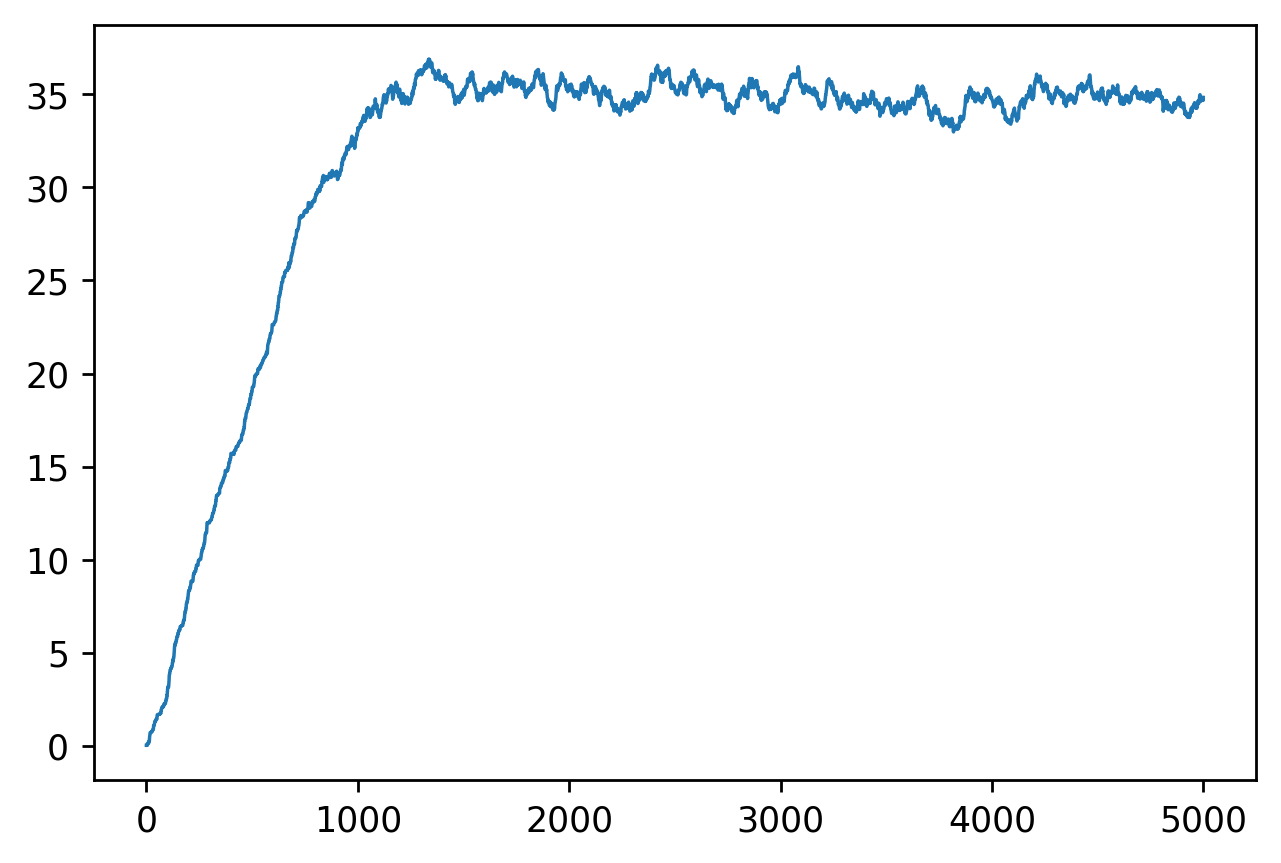

In [83]:
plt.plot(chain,linewidth=1)
plt.gcf().set_dpi(250)

In [23]:
#one parameter: x
#pdf: gaussian with mean 2, variance 2

def pdf(x):
    return (1 / np.sqrt(4*np.pi)) * np.exp( (-1/4) * ((x - 2)**2))

#initial guess: (average) x = 0
x_current = 0
p_current = pdf(x_current)

#for storing accepted values
chain = []
ps = []

for i in range(10000):
    #proposal function:
    #for given x_current, x_proposed is drawn from gaussian with mean x_current, variance 1
    x_proposed = np.random.normal(x_current,1)
    
    #r value: draw random number from uniform distribution between 0 and 1
    r = np.random.rand()
    
    #ratio: p(x_proposed) / p(x_current)
    p_proposed = pdf(x_proposed)
    ratio = p_proposed / p_current
    
    #compare ratio and r
    #if ratio > r, accept  
    if ratio > r:
        x_current = x_proposed
        p_current = p_proposed
    #if ratio < r, retry (repeat the loop with same x_current)
    
    chain.append(x_current)
    ps.append(p_current)

(0, 0.3)

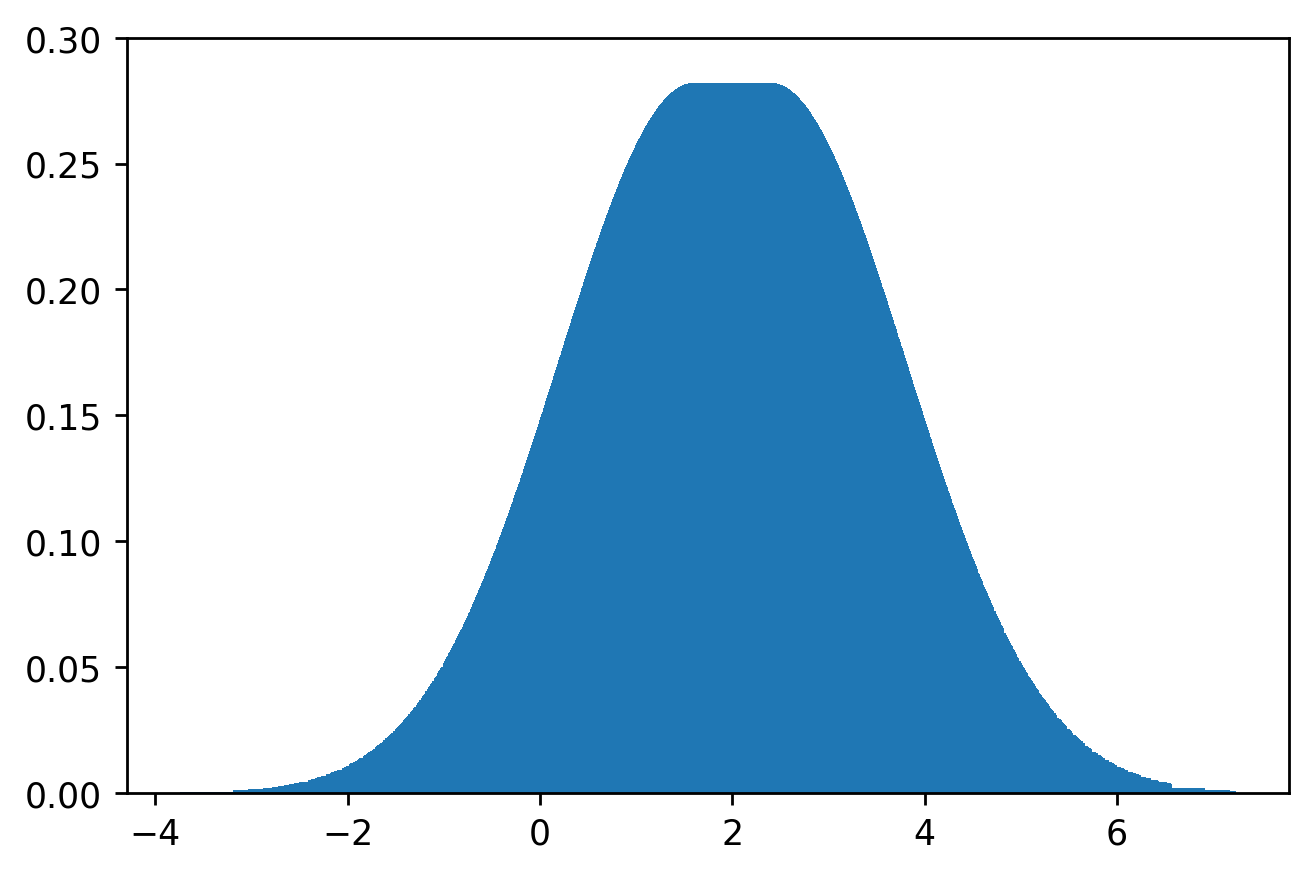

In [43]:
#plt.plot(chain,linewidth=1)
#plt.plot(chain,ps,'.',markersize=1)
plt.bar(chain,ps)

plt.gcf().set_dpi(250)
plt.gca().set_ylim(0,0.3)

In [84]:
#------------------------------------------------------------------------------------